In [22]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from matplotlib.pyplot import text

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [23]:
# Combine the data into a single dataset
pyber_data_complete = pd.merge(ride_data, city_data, how="left", on=["city"])

# Display the data table for preview
pyber_data_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

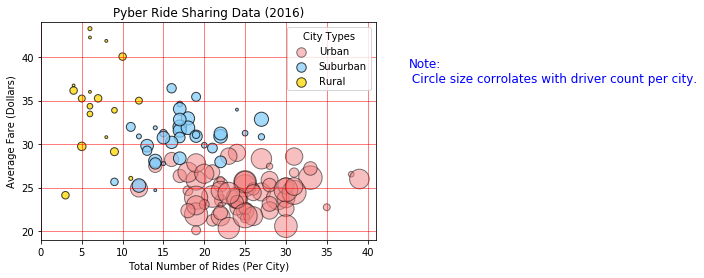

In [24]:
# Obtain the x and y coordinates for each of the three city types
pyber_urban=pyber_data_complete.loc[pyber_data_complete["type"]=="Urban"]
pyber_suburban=pyber_data_complete.loc[pyber_data_complete["type"]=="Suburban"]
pyber_rural=pyber_data_complete.loc[pyber_data_complete["type"]=="Rural"]

#Urban type
average_fare=pyber_urban.groupby(["city"]).mean()["fare"] 
total_rides=pyber_urban.groupby(["city"]).count()["type"]
drivers=pyber_urban.groupby(["city"]).mean()["driver_count"]

#Suburban type
average_fare_sub=pyber_suburban.groupby(["city"]).mean()["fare"] 
total_rides_sub=pyber_suburban.groupby(["city"]).count()["type"]
drivers_sub=pyber_suburban.groupby(["city"]).mean()["driver_count"]

#Rural type
average_fare_rur=pyber_rural.groupby(["city"]).mean()["fare"] 
total_rides_rur=pyber_rural.groupby(["city"]).count()["type"]
drivers_rur=pyber_rural.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(total_rides, average_fare, marker="o", facecolor="lightcoral", 
            edgecolors="black",s=drivers*8, alpha=0.5)
plt.scatter(total_rides_sub, average_fare_sub, marker="o", facecolors="lightskyblue", 
            edgecolors="black",s=drivers_sub*8, alpha=0.75)
plt.scatter(total_rides_rur, average_fare_rur, marker="o", facecolor="gold", 
            edgecolors="black",s=drivers_rur*8, alpha=0.75)

#Limit the chart
plt.ylim(19, 44)
plt.xlim(0, 41)

# Incorporate the other graph properties
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (Dollars)")

# Create a legend
lgnd=plt.legend(["Urban", "Suburban", "Rural"], title="City Types", loc="best", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [90]
lgnd.legendHandles[1]._sizes = [90]
lgnd.legendHandles[2]._sizes = [90]

# Incorporate a text label regarding circle size
text(45, 40, 
     "Note:\n Circle size corrolates with driver count per city.",
     verticalalignment='top', 
     horizontalalignment='left',
     color='blue', 
     fontsize=12)

# Save Figure
plt.savefig("ridesharing.png")
plt.show()


In [25]:
# Show plot
plt.show()

## Total Fares by City Type

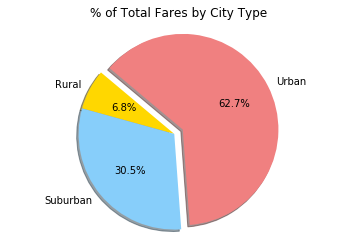

In [17]:
total_fares=pyber_data_complete.groupby(["type"]).sum()

# Calculate Type Percents
grand_total=total_fares["fare"][0]+total_fares["fare"][1]+total_fares["fare"][2]
Urban=total_fares["fare"]["Urban"]/grand_total
Rural=total_fares["fare"]["Rural"]/grand_total
Suburban=total_fares["fare"]["Suburban"]/grand_total

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban","Urban" ]
plt.title('% of Total Fares by City Type')
# The values of each section of the pie chart
sizes = [Rural, Suburban, Urban ]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("piechart_fares.png")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

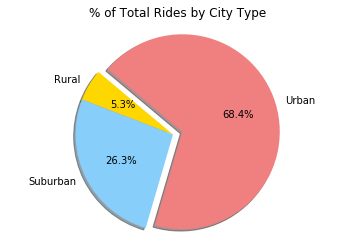

In [19]:
# Calculate Ride Percents
total_rides=pyber_data_complete.groupby(["type"]).count()

# Calculate Type Percents
grand_total=total_rides["city"][0]+total_rides["city"][1]+total_rides["city"][2]
Urban=total_rides["city"]["Urban"]/grand_total
Rural=total_rides["city"]["Rural"]/grand_total
Suburban=total_rides["city"]["Suburban"]/grand_total

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban","Urban" ]
plt.title('% of Total Rides by City Type')

# The values of each section of the pie chart
sizes = [Rural, Suburban, Urban ]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("piechart_rides.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

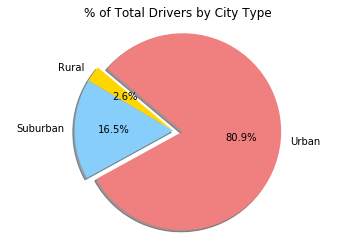

In [20]:
# Calculate Driver Percents
grand_total=drivers.sum()+drivers_sub.sum()+drivers_rur.sum()
Urban=drivers.sum()/grand_total
Rural=drivers_rur.sum()/grand_total
Suburban=drivers_sub.sum()/grand_total


# Labels for the sections of our pie chart
labels = ["Rural", "Suburban","Urban" ]
plt.title('% of Total Drivers by City Type')

# The values of each section of the pie chart
sizes = [Rural, Suburban, Urban ]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("piechart_drivers.png")


In [21]:
# Show Figure
plt.show()